# Car Prediction Project

*Importing Libraries* 

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

*Reading Car_price Datasets*

In [267]:
df = pd.read_csv('CarPrice_Assignment.csv')
y = df['price']
df_feat = df.drop(['price'],axis=1)

In [268]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA

<Axes: xlabel='enginesize', ylabel='price'>

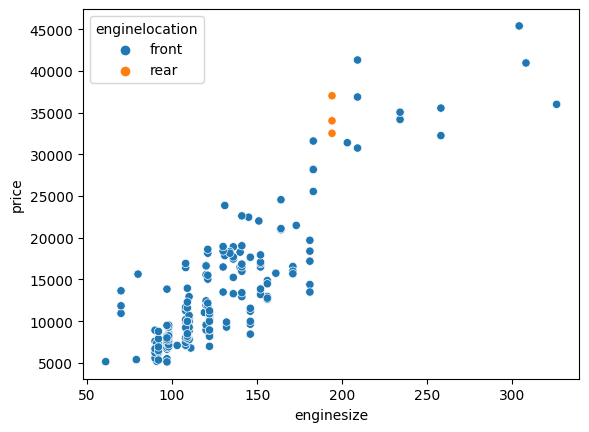

In [269]:
sns.scatterplot(x=df['enginesize'],y=df['price'],hue=df['enginelocation'])

*Performing Hot-one Encoding on Objects Having Two Unique Values*

In [270]:
df_ob=df.select_dtypes(include = ['object'])
unique_counts = df_ob.nunique()
unique_counts[unique_counts == 2].index.tolist()

['fueltype', 'aspiration', 'doornumber', 'enginelocation']

In [271]:
encoded_df = pd.get_dummies(df_feat, columns=['fueltype', 'aspiration', 'doornumber', 'enginelocation'])
encoded_df.head()

,car_ID,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear
0,1,3,alfa-romero giulia,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,21,27,False,True,True,False,False,True,True,False
1,2,3,alfa-romero stelvio,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,21,27,False,True,True,False,False,True,True,False
2,3,1,alfa-romero Quadrifoglio,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,19,26,False,True,True,False,False,True,True,False
3,4,2,audi 100 ls,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,24,30,False,True,True,False,True,False,True,False
4,5,2,audi 100ls,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,18,22,False,True,True,False,True,False,True,False


In [272]:
encoded_df = encoded_df.drop(['CarName',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',],axis=1)

# Model Training

In [249]:
from sklearn.model_selection import train_test_split
X = encoded_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [250]:
from sklearn.linear_model import LinearRegression

In [251]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [252]:
predictions = Lr.predict(X_test)

# Evaluating Predictions 

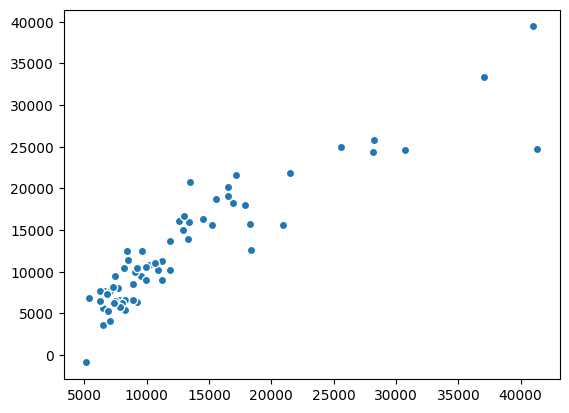

In [253]:
plt.scatter(y_test,predictions,edgecolors='white')

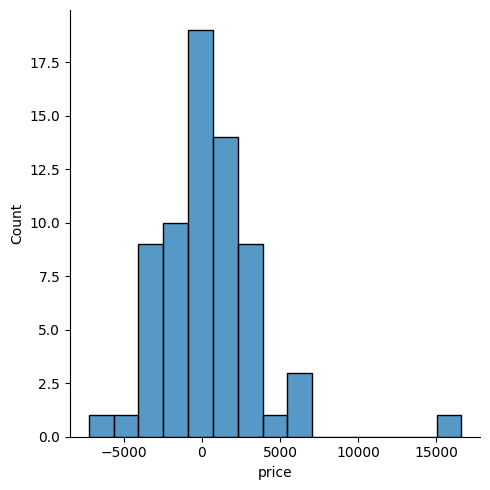

In [254]:
sns.displot((y_test-predictions),kind="hist");

In [255]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2254.5041590482256
MSE: 10690699.04172158
RMSE: 3269.6634447174497
